<a href="https://colab.research.google.com/github/Predic-learning/Smart-walking/blob/main/testAcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Weather/Smart_walker_detect.csv')
data.head()

,date,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,Temperature,Fall_detection
0,"23/1/2023, 21:55:46",132,-284,20228,-488,-3,60,30.37,0
1,"23/1/2023, 21:55:47",240,-92,19784,-489,-92,61,30.41,0
2,"23/1/2023, 21:55:48",200,-140,19928,-481,-69,35,30.41,0
3,"23/1/2023, 21:55:49",108,-44,20004,-498,-67,55,30.41,0
4,"23/1/2023, 21:55:50",304,12,20044,-469,-39,77,30.55,0


<AxesSubplot:xlabel='Fall_detection', ylabel='count'>

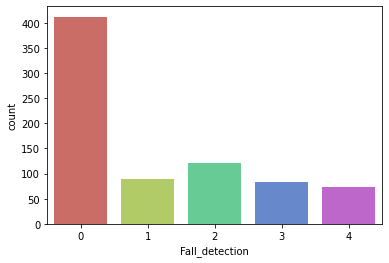

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot("Fall_detection",data=data,palette="hls")

In [ ]:
data[["AccX","AccY","AccZ","GyrX","GyrY","GyrZ","Temperature"]].describe()

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,Temperature
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,84.814341,-170.350832,19254.104994,-508.151088,-49.340589,60.162612,30.629475
std,5344.493119,4545.568200,8042.112085,1354.189746,1514.348177,237.147845,11.829266
min,-21120.000000,-21584.000000,0.000000,-10190.000000,-9760.000000,-2787.000000,0.000000
25%,0.000000,-284.000000,16684.000000,-496.000000,-118.000000,43.000000,28.290000
50%,232.000000,-136.000000,19904.000000,-472.000000,-68.000000,61.000000,30.550000
75%,408.000000,0.000000,20120.000000,-450.000000,-7.000000,76.000000,30.980000
max,24680.000000,19604.000000,101824.000000,11642.000000,10706.000000,2802.000000,137.050000


In [ ]:
df=data.drop(["date","Temperature","GyrX","GyrY","GyrZ"],axis=1)
#df=data.drop(["date","Temperature","AccX","AccY","AccZ"],axis=1)

<AxesSubplot:xlabel='AccZ', ylabel='Count'>

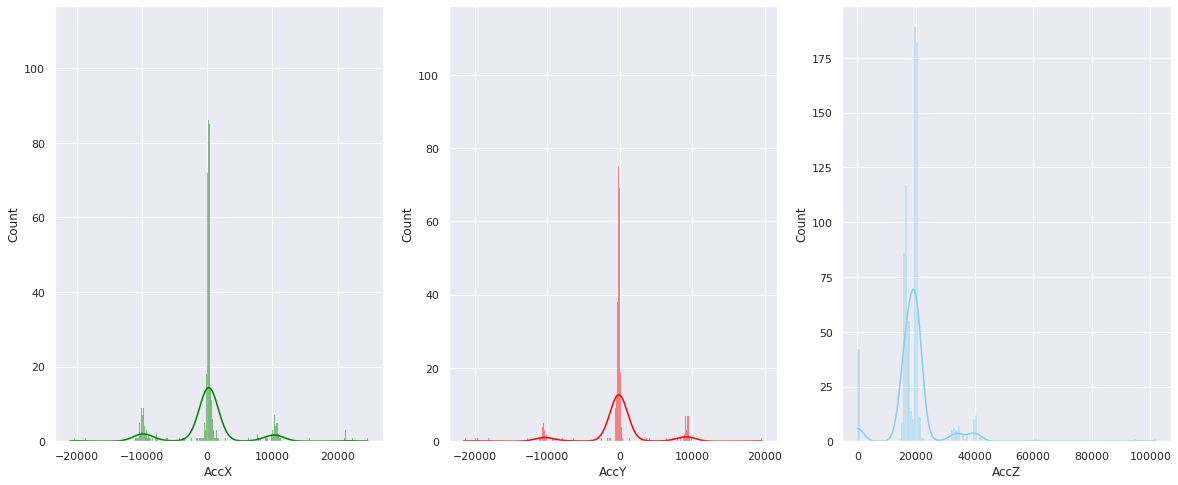

In [ ]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(1,3,figsize=(20,8))
sns.histplot(data=df,x="AccX",kde=True,ax=axs[0],color='green')
sns.histplot(data=df,x="AccY",kde=True,ax=axs[1],color='red')
sns.histplot(data=df,x="AccZ",kde=True,ax=axs[2],color='skyblue')

<AxesSubplot:>

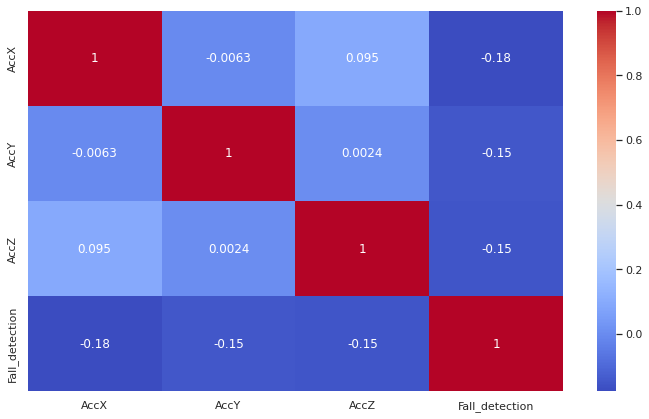

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [ ]:
x=((df.loc[:,df.columns!="Fall_detection"]).astype(float)).values[:,0:]
y=df['Fall_detection'].values.reshape(-1, 1)

In [ ]:
df.Fall_detection.unique()

array([0, 2, 3, 4, 1])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [ ]:
x_train.dtype,x_test.dtype,y_train.dtype,y_test.dtype

(dtype('float64'), dtype('float64'), dtype('int64'), dtype('int64'))

In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))

KNN Accuracy:96.20%


In [ ]:
svm=SVC()
svm.fit(x_train,y_train)
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))

SVM Accuracy:88.61%


In [ ]:
gbc=GradientBoostingClassifier(subsample=0.5,n_estimators=450,max_depth=5,max_leaf_nodes=25)
gbc.fit(x_train,y_train)
print("Gradient Boosting Accuracy:{:.2f}%".format(gbc.score(x_test,y_test)*100))

Gradient Boosting Accuracy:93.67%


In [ ]:
import warnings
warnings.filterwarnings('ignore')
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print("XGB Accuracy:{:.2f}%".format(xgb.score(x_test,y_test)*100))

XGB Accuracy:92.41%


In [ ]:
input=[[296,9256,17164]]
ot=xgb.predict(input)
print("The weather is:")
if(ot==0):
    print("Normal")
elif(ot==1):
    print("Fall_front")
elif(ot==2):
    print("Fall_back")
elif(ot==3):
    print("Fall_left")
else:
    print("Fall_right")

The weather is:
Fall_left
